In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn import datasets as dt


In [4]:
# =========== Loading dataset ===========
n_samples = 1000
n_outliers = 50
X, y, coef = dt.make_regression(
                n_samples=n_samples,
                n_features=1,
                n_informative=1,
                noise=10,
                coef=True,
                random_state=0)

In [5]:
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)


In [6]:
# =========== Modeling ===========
# Linear Model
lr = lm.LinearRegression()
lr.fit(X, y)

# Lasso
lasso = lm.Lasso( alpha=200 )
lasso.fit(X, y)

# Ridge
ridge = lm.Ridge( alpha=200 )
ridge.fit(X, y)

# RANSAC
ransac = lm.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


In [7]:
# =========== Predict ===========
X_plot = np.arange(X.min(), X.max())[:, np.newaxis]
#X_plot = X
y_linear_model = lr.predict( X_plot )
y_lasso = lasso.predict( X_plot )
y_ridge = ridge.predict( X_plot )
y_ransac = ransac.predict( X_plot )


In [8]:
# =========== Coeficients ===========
print( lr.coef_ )
print( lasso.coef_ )
print( ridge.coef_ )
# =========== Plots =====

[54.17236387]
[0.]
[47.40101138]


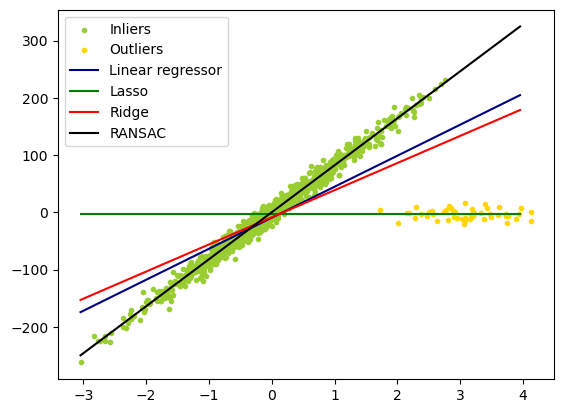

In [10]:
# =========== Plots ===========
plt.scatter( X[inlier_mask],
y[inlier_mask], color="yellowgreen", marker=".", label="Inliers" )
plt.scatter( X[outlier_mask],
y[outlier_mask], color="gold", marker=".", label="Outliers" )
plt.plot( X_plot, y_linear_model, color="navy", label="Linear regressor");
plt.plot( X_plot, y_lasso, color="green", label="Lasso");
plt.plot( X_plot, y_ridge, color="red", label="Ridge");
plt.plot( X_plot, y_ransac, color="black", label="RANSAC");
plt.legend();